In [14]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from numpy import diff
import math

In [3]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

In [4]:
filename = 'Sigmoid.csv'

In [5]:
urllib.request.urlretrieve(url, filename)

('Sigmoid.csv', <http.client.HTTPMessage at 0x16d7b8b9ee0>)

In [6]:
data = np.loadtxt(filename,dtype=str,skiprows=1)
data1 = []
X = []
Y = []
for i in range(len(data)):
    lista = data[i].split(",")
    lista1 = [ float(x) for x in lista ]
    data1.append(lista1)
    
for i in data1:
    X.append(i[0])
    Y.append(i[1])
x = np.array(X)
y = np.array(Y)
len(y)

50

In [7]:
def M(x,theta):
    a = theta[0]/(theta[1]+np.exp(-1*theta[2]*x))
    return a

In [8]:
def Costo(theta):
    b = 0
    for i in range(len(x)):
        b += (y[i]-M(x[i],theta))**2
    return b
Costo([1,2,3])

258.22739171024347

In [9]:
def D_Parciales1(t,h = 0.01):
    D = np.zeros(3)
    
    D[0] = (Costo([t[0]+h,t[1],t[2]]) - Costo([t[0]-h,t[1],t[2]]))/(2*h)
    D[1] = (Costo([t[0],t[1]+h,t[2]]) - Costo([t[0],t[1]-h,t[2]]))/(2*h)
    D[2] = (Costo([t[0],t[1],t[2]+h]) - Costo([t[0],t[1],t[2]-h]))/(2*h)
    return D
D_Parciales1([1,1,1])

array([-110.01069727,  103.89842074,   -5.93182878])

In [10]:
def D_Parciales2(k,t, h = 0.01):
    sum1 = 0
    t1 = t.copy()
    t2 = t.copy()
            
    t1[k] = t1[k]+h
    t2[k] = t2[k]-h
    
    for i in range(len(y)):
        f1 = y[i]-M(x[i],t)
        DP = (M(x[i],t1) - M(x[i],t2))/(2*h)
        sum1+= f1*DP
        
    return (-2)*sum1
print('Por lo siguiente las derivadas parciales de la métrica se encuentran por la fórmula dada al comparar con la derivada común.\n',D_Parciales2(0,[1,1,1]),D_Parciales2(1,[1,1,1]),D_Parciales2(2,[1,1,1]))

Por lo siguiente las derivadas parciales de la métrica se encuentran por la fórmula dada al comparar con la derivada común.
 -110.0106972728062 103.90111918798551 -5.9317654127667145


In [23]:
def Descenso1(t,gamma,itmax,ep): 
    e0 = 1
    it_min = 0
    for it in range(itmax):
        if e0 > ep:
            f1 = D_Parciales1(t)
            t = t-gamma*f1
    return t
a = Descenso1([1,1,1],1e-3,10000,0.01)
print('Descenso:\n',a)
print('Costo:\n',Costo(a))

Descenso:
 [4.40296875 0.97576351 2.78679217]
Costo:
 0.10502529239651599


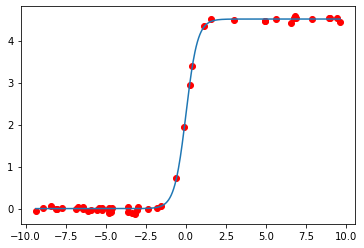

In [21]:
x_ = np.linspace(min(x),max(x),500)

plt.plot(x_,M(x_,a))
plt.scatter(x,y,c='r')